In [2]:
#Курсовой проект на тему "Использование методом машинного обучения и нейронных сетей для предсказания сердечно-сосудистых заболевани2"
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('heart_2020_cleaned.csv')

In [4]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
data['Diabetic'].value_counts()

Diabetic
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: count, dtype: int64

In [7]:
bin_value_cols = [col for col in data.columns if data[col].astype(str).str.lower().isin(['yes', 'no']).all()]

In [8]:
bin_value_cols

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [9]:
data[bin_value_cols] = data[bin_value_cols].astype(str).apply(lambda x: x.str.lower())

In [10]:
data[bin_value_cols] = data[bin_value_cols].replace({'yes':1, 'no':0})

/tmp/ipykernel_4652/1127582382.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[bin_value_cols] = data[bin_value_cols].replace({'yes':1, 'no':0})


In [11]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,No,0,Good,12.0,0,0,0


In [12]:
data['Sex'] = data['Sex'].replace({'Female':1, 'Male': 0})

/tmp/ipykernel_4652/243546194.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'Female':1, 'Male': 0})


In [14]:
data['HeartDisease'].value_counts() # явный дизбаланс классов

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt

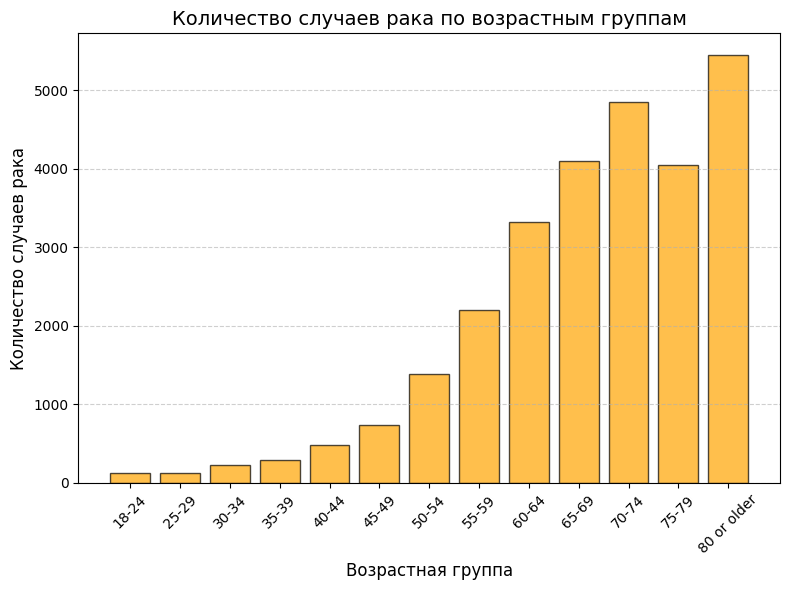

In [17]:
grouped_by_age_and_cancer = data[['AgeCategory', 'HeartDisease']].groupby(['AgeCategory'])['HeartDisease'].sum()

plt.figure(figsize=(8, 6))
plt.bar(grouped_by_age_and_cancer.index, grouped_by_age_and_cancer.values, color='orange', alpha=0.7, edgecolor='black')

plt.title('Количество случаев рака по возрастным группам', fontsize=14)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Количество случаев рака', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

В основном рак имеется у более возрастных пациентов

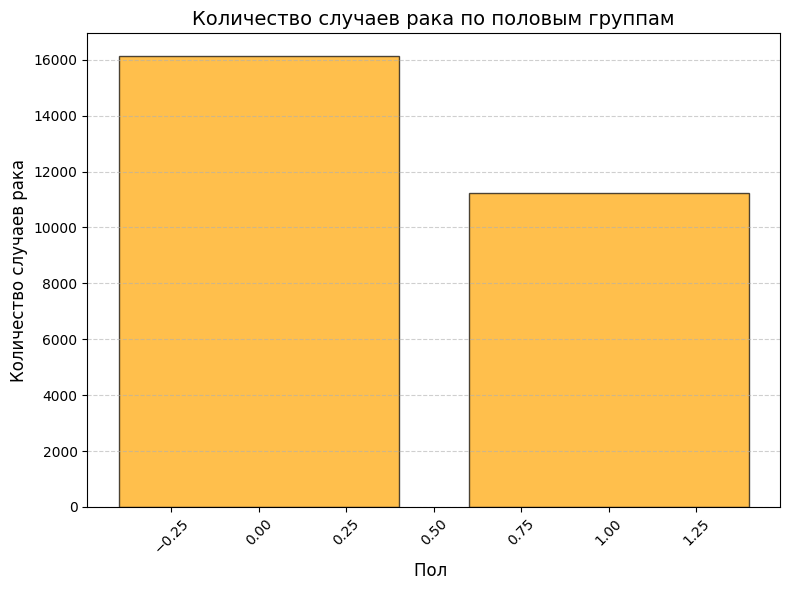

In [18]:
grouped_by_age_and_cancer = data[['Sex', 'HeartDisease']].groupby(['Sex'])['HeartDisease'].sum()

plt.figure(figsize=(8, 6))
plt.bar(grouped_by_age_and_cancer.index, grouped_by_age_and_cancer.values, color='orange', alpha=0.7, edgecolor='black')

plt.title('Количество случаев рака по половым группам', fontsize=14)
plt.xlabel('Пол ', fontsize=12)
plt.ylabel('Количество случаев рака', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [19]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [20]:
X = data.drop(columns=['HeartDisease']) # features
Y = data['HeartDisease'] # targets

In [21]:
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [22]:
X.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'PhysicalActivity', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'AgeCategory_25-29',
       'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44',
       'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59',
       'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74',
       'AgeCategory_75-79', 'AgeCategory_80 or older', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good'],
      dtype='object')

In [23]:
bool_columns = [col for col in X.columns if X[col].dtype == bool]

In [24]:
X[bool_columns] = X[bool_columns].replace({True:1, False:0})

/tmp/ipykernel_4652/3487154824.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[bool_columns] = X[bool_columns].replace({True:1, False:0})


In [25]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,1,0,0,3.0,30.0,0,1,1,5.0,...,0,0,1,0,1,0,0,0,0,1
1,20.34,0,0,1,0.0,0.0,0,1,1,7.0,...,0,0,1,0,0,0,0,0,0,1
2,26.58,1,0,0,20.0,30.0,0,0,1,8.0,...,0,0,1,0,1,0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,1,0,6.0,...,0,0,1,0,0,0,0,1,0,0
4,23.71,0,0,0,28.0,0.0,1,1,1,8.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,0,0,6.0,...,1,0,0,0,1,0,1,0,0,0
319791,29.84,1,0,0,0.0,0.0,0,0,1,5.0,...,1,0,0,0,0,0,0,0,0,1
319792,24.24,0,0,0,0.0,0.0,0,1,1,6.0,...,1,0,0,0,0,0,0,1,0,0
319793,32.81,0,0,0,0.0,0.0,0,1,0,12.0,...,1,0,0,0,0,0,0,1,0,0


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
scaler = StandardScaler()

In [27]:
X_train.dtypes

BMI                                 float64
Smoking                               int64
AlcoholDrinking                       int64
Stroke                                int64
PhysicalHealth                      float64
MentalHealth                        float64
DiffWalking                           int64
Sex                                   int64
PhysicalActivity                      int64
SleepTime                           float64
Asthma                                int64
KidneyDisease                         int64
SkinCancer                            int64
AgeCategory_25-29                     int64
AgeCategory_30-34                     int64
AgeCategory_35-39                     int64
AgeCategory_40-44                     int64
AgeCategory_45-49                     int64
AgeCategory_50-54                     int64
AgeCategory_55-59                     int64
AgeCategory_60-64                     int64
AgeCategory_65-69                     int64
AgeCategory_70-74               

In [28]:
columns_for_scaling = [col for col in X_train.columns if not X_train[col].apply(lambda x: x in [0, 1]).all()]

In [29]:
columns_for_scaling

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [30]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [31]:
X_train_scaled[columns_for_scaling] = scaler.fit_transform(X_train[columns_for_scaling])
X_test_scaled[columns_for_scaling] = scaler.transform(X_test[columns_for_scaling])

In [32]:
cat_features_for_cat_boost = X_train.drop(columns=columns_for_scaling)
# Преобразуем названия категориальных признаков в их индексы
cat_features_for_cat_boost = [X_train.columns.get_loc(col) for col in X_train.columns if col in cat_features_for_cat_boost]


In [33]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=2000, depth=6, learning_rate=0.05, loss_function='Logloss', cat_features=cat_features_for_cat_boost)
model.fit(X_train_scaled, y_train)

0:	learn: 0.6364477	total: 80.6ms	remaining: 2m 41s
1:	learn: 0.5862788	total: 107ms	remaining: 1m 47s
2:	learn: 0.5432145	total: 135ms	remaining: 1m 30s
3:	learn: 0.5060458	total: 161ms	remaining: 1m 20s
4:	learn: 0.4731316	total: 186ms	remaining: 1m 14s
5:	learn: 0.4452337	total: 208ms	remaining: 1m 9s
6:	learn: 0.4211576	total: 235ms	remaining: 1m 6s
7:	learn: 0.3997740	total: 259ms	remaining: 1m 4s
8:	learn: 0.3804511	total: 285ms	remaining: 1m 3s
9:	learn: 0.3650850	total: 313ms	remaining: 1m 2s
10:	learn: 0.3512922	total: 343ms	remaining: 1m 1s
11:	learn: 0.3386807	total: 375ms	remaining: 1m 2s
12:	learn: 0.3288981	total: 407ms	remaining: 1m 2s
13:	learn: 0.3191404	total: 438ms	remaining: 1m 2s
14:	learn: 0.3109495	total: 466ms	remaining: 1m 1s
15:	learn: 0.3026771	total: 491ms	remaining: 1m
16:	learn: 0.2951391	total: 518ms	remaining: 1m
17:	learn: 0.2892900	total: 544ms	remaining: 59.9s
18:	learn: 0.2841564	total: 568ms	remaining: 59.3s
19:	learn: 0.2792526	total: 594ms	remaini

In [34]:
feature_importances = model.get_feature_importance()

# Создаем DataFrame для удобного отображения
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
feature_importance_df

,Feature,Importance
0,BMI,7.407745
1,Smoking,3.532280
2,AlcoholDrinking,0.683455
3,Stroke,3.735803
4,PhysicalHealth,4.269453
5,MentalHealth,3.016850
6,DiffWalking,3.370205
7,Sex,5.427181
8,PhysicalActivity,0.785144
9,SleepTime,3.545024


In [35]:
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]

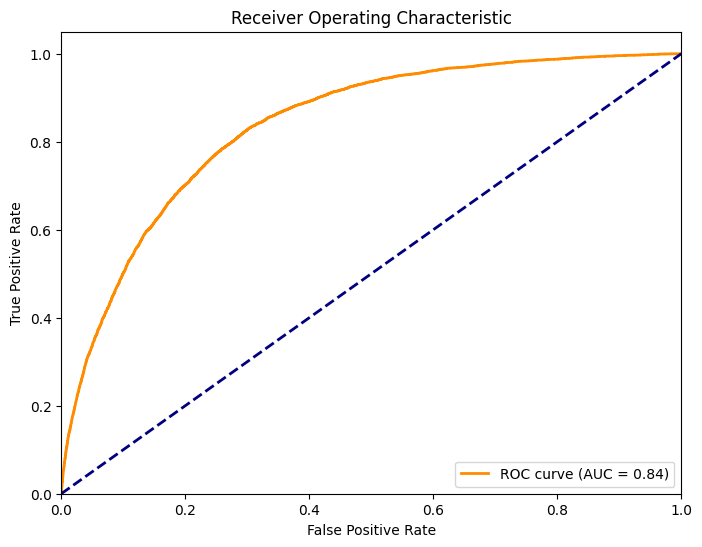

Оптимальный порог для F1: 0.18602929907849516
Оптимальный порог для F2: 0.09100438561868814
Оптимальный порог для F0.5: 0.30455714192227845
Оптимальный порог для recall: 0.0010096400485778458


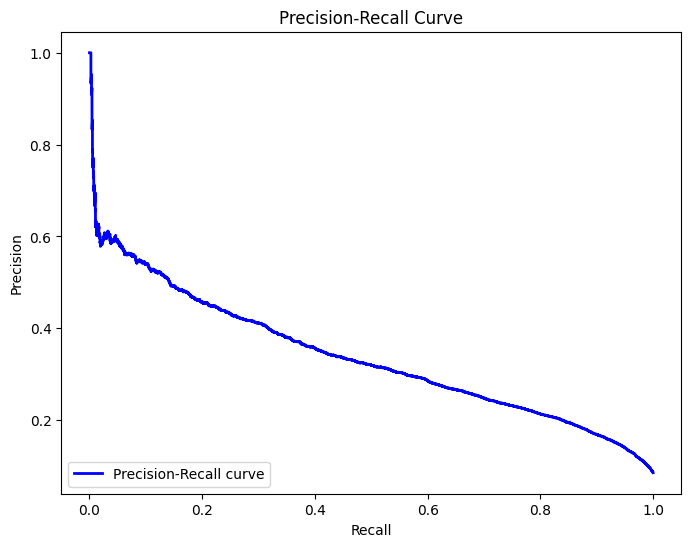

F1 score для оптимального порога F1:  0.3929738562091503
F2 score для оптимального порога F2:  0.5194454004621663
F0.5 score для оптимального порога F0.5:  0.38445600626179843
Recall score для оптимального порога Recall:  11.682009132420092


In [48]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, f1_score, fbeta_score
import matplotlib.pyplot as plt
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Выводим ROC-кривую
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Расчёт F1 и F-beta score для различных порогов
f1_scores = []
f2_scores = []
f0_5_scores = []
recall_scores = []

for thresh in thresholds:
    y_pred = (y_pred_proba >= thresh).astype(int) 
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    f0_5 = fbeta_score(y_test, y_pred, beta=0.5)
    f1_scores.append(f1)
    f2_scores.append(f2)
    f0_5_scores.append(f0_5)
    recall_scores.append(np.sum(y_pred == 1) / np.sum(y_test == 1))

optimal_threshold_f1 = thresholds[np.argmax(f1_scores)]
optimal_threshold_f2 = thresholds[np.argmax(f2_scores)]
optimal_threshold_f0_5 = thresholds[np.argmax(f0_5_scores)]
optimal_threshold_recall = thresholds[np.argmax(recall_scores)]

# Выводим оптимальные пороги
print(f'Оптимальный порог для F1: {optimal_threshold_f1}')
print(f'Оптимальный порог для F2: {optimal_threshold_f2}')
print(f'Оптимальный порог для F0.5: {optimal_threshold_f0_5}')
print(f'Оптимальный порог для recall: {optimal_threshold_recall}')

# Строим Precision-Recall кривую
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# График Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Теперь можно использовать найденный порог для классификации
y_pred_optimal_f1 = (y_pred_proba >= optimal_threshold_f1).astype(int)
y_pred_optimal_f2 = (y_pred_proba >= optimal_threshold_f2).astype(int)
y_pred_optimal_f0_5 = (y_pred_proba >= optimal_threshold_f0_5).astype(int)
y_pred_optimal_recall = (y_pred_proba >= optimal_threshold_recall).astype(int)

# Можно также посмотреть статистику для новых предсказаний
print("F1 score для оптимального порога F1: ", f1_score(y_test, y_pred_optimal_f1))
print("F2 score для оптимального порога F2: ", fbeta_score(y_test, y_pred_optimal_f2, beta=2))
print("F0.5 score для оптимального порога F0.5: ", fbeta_score(y_test, y_pred_optimal_f0_5, beta=0.5))
print("Recall score для оптимального порога Recall: ", np.sum(y_pred_optimal_recall == 1) / np.sum(y_test == 1))



In [53]:
y_pred = np.where(model.predict_proba(X_test_scaled)[:,1] > 0.1, 1, 0)

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     58484
           1       0.23      0.75      0.35      5475

    accuracy                           0.77     63959
   macro avg       0.60      0.76      0.61     63959
weighted avg       0.91      0.77      0.82     63959



In [55]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [56]:
log_regs_preds = np.where(log_reg.predict_proba(X_test_scaled)[:,1] > 0.111,1,0)

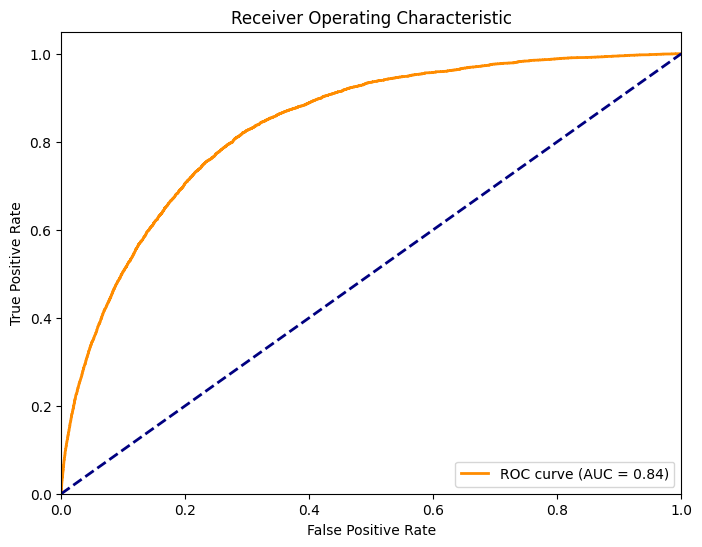

Оптимальный порог для F1: 0.2001132596880373
Оптимальный порог для F2: 0.09552474953785842
Оптимальный порог для F0.5: 0.3075580107074286
Оптимальный порог для recall: 0.00081801889197802


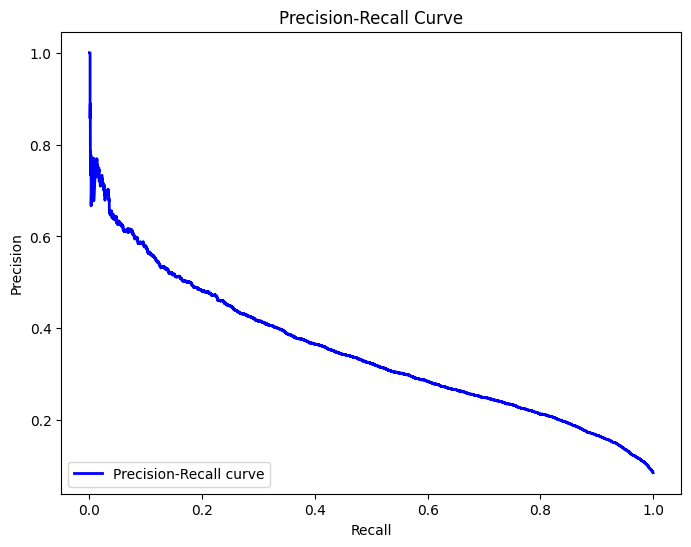

F1 score для оптимального порога F1:  0.38888486865909255
F2 score для оптимального порога F2:  0.5183528647460084
F0.5 score для оптимального порога F0.5:  0.38317669612381355
Recall score для оптимального порога Recall:  11.682009132420092


In [57]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, f1_score, fbeta_score
import matplotlib.pyplot as plt
import numpy as np

log_pred_predict_proba = log_reg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, log_pred_predict_proba)
roc_auc = roc_auc_score(y_test, log_pred_predict_proba)

# Выводим ROC-кривую
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Расчёт F1 и F-beta score для различных порогов
f1_scores = []
f2_scores = []
f0_5_scores = []
recall_scores = []

for thresh in thresholds:
    y_pred = (log_pred_predict_proba >= thresh).astype(int) 
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    f0_5 = fbeta_score(y_test, y_pred, beta=0.5)
    f1_scores.append(f1)
    f2_scores.append(f2)
    f0_5_scores.append(f0_5)
    recall_scores.append(np.sum(y_pred == 1) / np.sum(y_test == 1))

optimal_threshold_f1 = thresholds[np.argmax(f1_scores)]
optimal_threshold_f2 = thresholds[np.argmax(f2_scores)]
optimal_threshold_f0_5 = thresholds[np.argmax(f0_5_scores)]
optimal_threshold_recall = thresholds[np.argmax(recall_scores)]

# Выводим оптимальные пороги
print(f'Оптимальный порог для F1: {optimal_threshold_f1}')
print(f'Оптимальный порог для F2: {optimal_threshold_f2}')
print(f'Оптимальный порог для F0.5: {optimal_threshold_f0_5}')
print(f'Оптимальный порог для recall: {optimal_threshold_recall}')

# Строим Precision-Recall кривую
precision, recall, _ = precision_recall_curve(y_test, log_pred_predict_proba)

# График Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Теперь можно использовать найденный порог для классификации
y_pred_optimal_f1 = (y_pred_proba >= optimal_threshold_f1).astype(int)
y_pred_optimal_f2 = (y_pred_proba >= optimal_threshold_f2).astype(int)
y_pred_optimal_f0_5 = (y_pred_proba >= optimal_threshold_f0_5).astype(int)
y_pred_optimal_recall = (y_pred_proba >= optimal_threshold_recall).astype(int)

# Можно также посмотреть статистику для новых предсказаний
print("F1 score для оптимального порога F1: ", f1_score(y_test, y_pred_optimal_f1))
print("F2 score для оптимального порога F2: ", fbeta_score(y_test, y_pred_optimal_f2, beta=2))
print("F0.5 score для оптимального порога F0.5: ", fbeta_score(y_test, y_pred_optimal_f0_5, beta=0.5))
print("Recall score для оптимального порога Recall: ", np.sum(y_pred_optimal_recall == 1) / np.sum(y_test == 1))



In [58]:
log_regs_preds.sum()

15524

In [59]:
log_regs_preds = np.where(log_reg.predict_proba(X_test_scaled)[:,1] > 0.10166738314448616,1,0)

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, log_regs_preds)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[45712 12772]
 [ 1461  4014]]


In [63]:
print(classification_report(y_test, log_regs_preds))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     58484
           1       0.24      0.73      0.36      5475

    accuracy                           0.78     63959
   macro avg       0.60      0.76      0.61     63959
weighted avg       0.91      0.78      0.82     63959

